In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
in_size = 28 * 28
out_size = 10

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 7s 13ms/step - loss: 0.4284 - accuracy: 0.8621 - val_loss: 0.1089 - val_accuracy: 0.9663
Epoch 2/50
469/469 [==============================] - 5s 12ms/step - loss: 0.1049 - accuracy: 0.9681 - val_loss: 0.0951 - val_accuracy: 0.9718
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.0735 - val_accuracy: 0.9787
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.0747 - val_accuracy: 0.9797
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0843 - val_accuracy: 0.9786
Epoch 6/50
469/469 [==============================] - 6s 14ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0757 - val_accuracy: 0.9810
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.0814 - val_accuracy: 0.9797

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.9837
正解率= 0.9836999773979187 loss= 0.21206484735012054


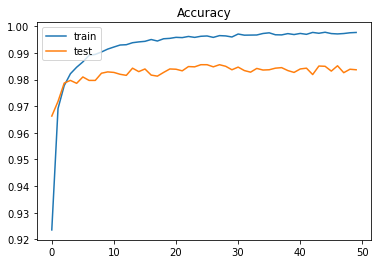

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

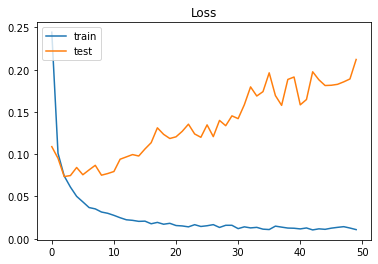

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()